In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
tb = pd.read_excel('CB_fit_results.xlsx')
tb[tb['Assignment']=='K27Ca-N-HN']

,Assignment,CA,N,HN,CB,1/covariance,pyruvate fraction,CB_scott
52,K27Ca-N-HN,56.514,117.237,6.788,43.843725,384.758032,0.317115,28.638


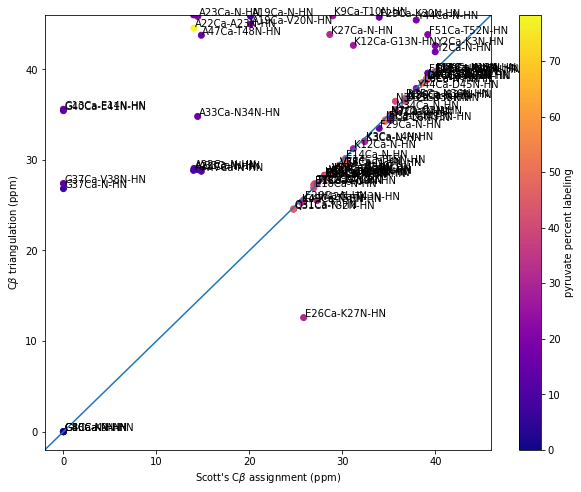

In [156]:
fig, ax = plt.subplots(figsize=[10,8])
result = ax.scatter(tb['CB_scott'], tb['CB'], c=100*tb['pyruvate fraction'].to_numpy(), cmap='plasma')
plt.plot([-2,46],[-2,46])
plt.xlim([-2,46])
plt.ylim([-2,46])
plt.xlabel("Scott's C$\\beta$ assignment (ppm)")
plt.ylabel("C$\\beta$ triangulation (ppm)")
cbar = plt.colorbar(result)
cbar.set_label('pyruvate percent labeling') 

for i,txt in enumerate(tb['Assignment'].to_numpy()):
    ax.annotate(txt, (tb['CB_scott'][i]+0.1, tb['CB'][i]+0.1))

plt.savefig('CB accuracy.png', dpi=300)
plt.show()

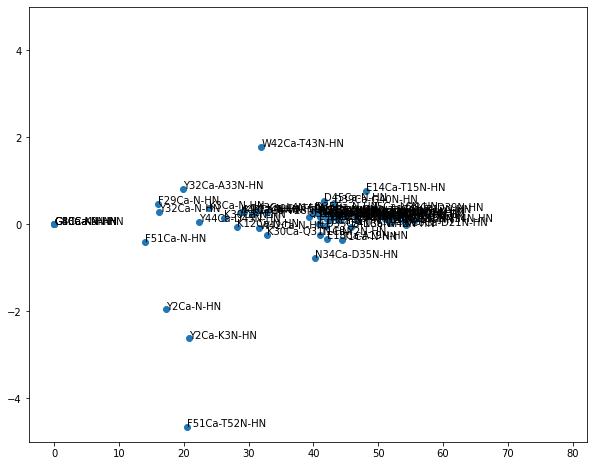

In [143]:
fig, ax = plt.subplots(figsize=[10,8])
result = ax.scatter(100*tb['pyruvate fraction'],tb['CB_scott']-tb['CB'])
plt.ylim([-5,5])
for i,txt in enumerate(tb['Assignment'].to_numpy()):
    ax.annotate(txt, (100*tb['pyruvate fraction'][i],tb['CB_scott'][i]-tb['CB'][i]))

#plt.savefig('CB accuracy_pyruvate.png', dpi=300)
plt.show()

In [158]:
tb['is_sequential']=np.append([False], [len(tb['Assignment'][i+1]) > len(tb['Assignment'][i]) for i in range(len(tb)-1)])
CB_not_sequential = tb['CB'][~tb['is_sequential']].to_numpy()
CB_sequential = tb['CB'][tb['is_sequential']].to_numpy()
CB_not_seq = CB_not_sequential[:-1]

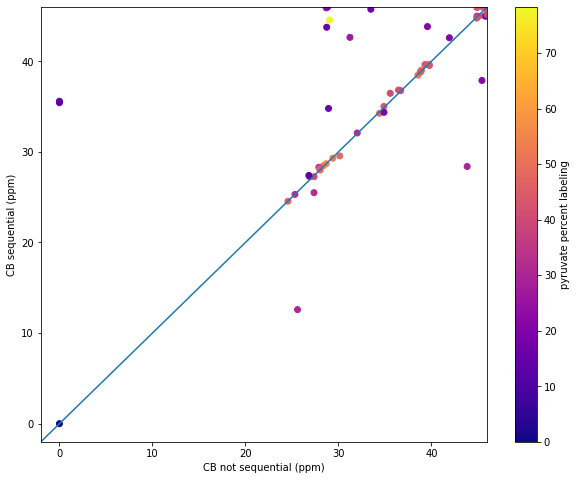

In [161]:
fig, ax = plt.subplots(figsize=[10,8])
result = ax.scatter(CB_not_seq, CB_sequential, c=100*tb['pyruvate fraction'][tb['is_sequential']].to_numpy(), cmap='plasma')
plt.plot([-2,46],[-2,46])
plt.xlim([-2,46])
plt.ylim([-2,46])
plt.xlabel("CB not sequential (ppm)")
plt.ylabel("CB sequential (ppm)")
cbar = plt.colorbar(result)
cbar.set_label('pyruvate percent labeling') 

#for i,txt in enumerate(tb['Assignment'][tb['is_sequential']].to_numpy()):
#    ax.annotate(txt, (CB_not_seq[i], CB_sequential[i]))

plt.savefig('CB assignment.png', dpi=300)
plt.show()


In [120]:
import nmrglue as ng
dic, dat = ng.sparky.read_lowmem_2D('GB1_BCG1.ucsf')
dic['w1']['xmtr_freq']=dic['w1']['xmtr_freq']-0.23
dic['w2']['xmtr_freq']=dic['w2']['xmtr_freq']-0.1

53.20000076293945